In [37]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
# read the pickle file
with open('../tracker_stubs/ball_detections.pkl', 'rb') as f:
    ball_positions = pickle.load(f)

In [ ]:
all_positions = [item.get(1) for item in ball_positions if item.get(1) is not None]

df_ball_positions = pd.DataFrame(all_positions, columns=['x1', 'y1', 'x2', 'y2'])

df_ball_positions = df_ball_positions.interpolate().bfill()

print(df_ball_positions)


             x1          y1           x2          y2
0    892.316162  616.287720   912.205811  637.001343
1    819.663940  686.124390   838.627808  706.205566
2    813.004211  694.572021   831.597839  714.798950
3    795.234741  718.699463   813.771606  739.216187
4    777.238037  742.121338   800.508362  766.545044
..          ...         ...          ...         ...
77  1185.849365  248.862076  1199.305420  265.137146
78  1184.819336  234.673309  1195.204102  245.255890
79  1184.037231  227.675308  1195.355347  241.473953
80  1180.690430  214.791275  1193.026245  228.990829
81  1180.483765  207.605850  1191.097290  218.561050

[82 rows x 4 columns]


In [40]:
df_ball_positions['mid_y'] = (df_ball_positions['y1'] + df_ball_positions['y2'])/2
print(df_ball_positions)
df_ball_positions['mid_y_rolling_mean'] = df_ball_positions['mid_y'].rolling(window=5, min_periods=1, center=False).mean()

             x1          y1           x2          y2       mid_y
0    892.316162  616.287720   912.205811  637.001343  626.644531
1    819.663940  686.124390   838.627808  706.205566  696.164978
2    813.004211  694.572021   831.597839  714.798950  704.685486
3    795.234741  718.699463   813.771606  739.216187  728.957825
4    777.238037  742.121338   800.508362  766.545044  754.333191
..          ...         ...          ...         ...         ...
77  1185.849365  248.862076  1199.305420  265.137146  256.999611
78  1184.819336  234.673309  1195.204102  245.255890  239.964600
79  1184.037231  227.675308  1195.355347  241.473953  234.574631
80  1180.690430  214.791275  1193.026245  228.990829  221.891052
81  1180.483765  207.605850  1191.097290  218.561050  213.083450

[82 rows x 5 columns]


0     626.644531
1     661.404755
2     675.831665
3     689.113205
4     702.157202
         ...    
77    474.779945
78    399.177223
79    331.919768
80    266.589732
81    233.302669
Name: mid_y_rolling_mean, Length: 82, dtype: float64


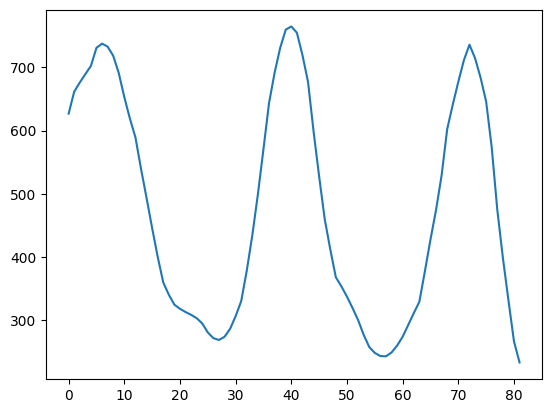

In [41]:
# plot mid_y_rolling_mean
plt.plot(df_ball_positions['mid_y_rolling_mean'])
print(df_ball_positions['mid_y_rolling_mean'])

In [42]:
df_ball_positions['delta_y'] = df_ball_positions['mid_y_rolling_mean'].diff()


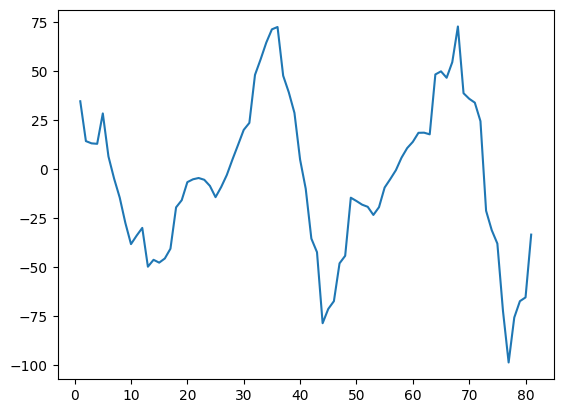

In [43]:
# plot mid_y_rolling_mean
plt.plot(df_ball_positions['delta_y'])

In [44]:
df_ball_positions['ball_hit']=0

In [45]:
minimum_change_frames_for_hit = 25
for i in range(1,len(df_ball_positions)- int(minimum_change_frames_for_hit*1.2) ):
    negative_position_change = df_ball_positions['delta_y'].iloc[i] >0 and df_ball_positions['delta_y'].iloc[i+1] <0
    positive_position_change = df_ball_positions['delta_y'].iloc[i] <0 and df_ball_positions['delta_y'].iloc[i+1] >0

    if negative_position_change or positive_position_change:
        change_count = 0 
        for change_frame in range(i+1, i+int(minimum_change_frames_for_hit*1.2)+1):
            negative_position_change_following_frame = df_ball_positions['delta_y'].iloc[i] >0 and df_ball_positions['delta_y'].iloc[change_frame] <0
            positive_position_change_following_frame = df_ball_positions['delta_y'].iloc[i] <0 and df_ball_positions['delta_y'].iloc[change_frame] >0

            if negative_position_change and negative_position_change_following_frame:
                change_count+=1
            elif positive_position_change and positive_position_change_following_frame:
                change_count+=1
    
        if change_count>minimum_change_frames_for_hit-1:
            df_ball_positions['ball_hit'].iloc[i] = 1

frame_nums_with_ball_hits = df_ball_positions[df_ball_positions['ball_hit']==1].index.tolist()

In [46]:
df_ball_positions[df_ball_positions['ball_hit']==1]

,x1,y1,x2,y2,mid_y,mid_y_rolling_mean,delta_y,ball_hit
